#### Import Package

<hr>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import datetime as dt
%matplotlib inline

#### Import Datasets

In [2]:
dfNew = pd.read_csv('dfNew.csv')
dfNew.head()

,Lyft,Uber,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft.1,Lyft XL,Shared,...,16,17,18,19,20,21,22,23,distance,price
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.50,17.0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.42,10.5
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.50,15.0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.99,9.0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2.12,7.0


### 3. Membuat new data frame untuk splitting dataset

In [3]:
x = dfNew.drop(columns = ['price'])
y = dfNew['price']
x

,Lyft,Uber,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft.1,Lyft XL,Shared,...,15,16,17,18,19,20,21,22,23,distance
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.50
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.42
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.50
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.99
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635237,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.69
635238,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.71
635239,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.71
635240,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.99


### 1. Building a function to evalute model

Saya akan membuat sebuah function yang mana function ini mempermudah perhitungan hasil akurasi dari tiap model yang sudah selesai di fitting dan dicari best estimators-nya. Dalam function ini akan digunakan beberapa metode perhitungan akurasi, yaitu:

MAPE (Mean Average Percentage Error):

$ \displaystyle MAPE = \frac{100}{n} \sum_{t=1}^n {\left|\frac{A_t - F_t}{A_t} \right|}$

Accuracy

$ Accuracy =  \displaystyle 100 - MAPE $

RMSE (Root Mean Squared Error)

$ \displaystyle RMSE = \sqrt{\sum_{i=1}^n \frac{(\hat{y}_i - y_i)^2}{n}}$

R2-Score

$ \displaystyle R2 Score = 1 - \frac{\sum_{i}(y_{i}-\hat{y}_i)^2}{\sum_{i}(y_{i}-\bar{y}_i)^2} $


r2 score : untuk mengetahui kontribusi features terhadap prediksi.
mape : rata - rata presentasi eror disetiap prediksi
rmse : akar dari rata - rata residual eror.

In [4]:
def evaluate(model, test_features, test_labels):
    vals = dict()
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE = {:0.2f}'.format(rmse))
    print('R2 Score = {:0.2f}.'.format(r2))
    vals['accuracy'] = accuracy
    vals['rmse'] = rmse
    vals['r2'] = r2
    
    return vals

### 2. Langkah selanjutnya, saya akan melakukan train_test_split kembali lalu memfitting data training, menggunakan beberapa model yaitu:

- Linear Regression
- Lasso
- Polynomial Regression

untuk evaluasi untuk mengetahui model yang kita buat jika modelnya masih kurang bagus maka modelnya perlu diperbaiki.


In [5]:
xtr, xts, ytr, yts = train_test_split(x,y,test_size = .2)

#data training 80%
#data test 20%

### Linier Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
lnr_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X' :[True, False],
}
print(lnr_grid)

{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}


In [8]:
lnr = LinearRegression()
lnr_random = RandomizedSearchCV(estimator=lnr, param_distributions=lnr_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

lnr_random.fit(xtr, ytr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   43.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=41, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [9]:
lnr_random.best_params_

{'normalize': False, 'fit_intercept': True, 'copy_X': False}

### Linear Regression with default hyperparameters

In [10]:
base_lnr = LinearRegression()
base_lnr.fit(xtr, ytr)
base_lnr_accuracy = evaluate(base_lnr, xts, yts)

Model Performance
Average Error: 1.9529 degrees.
Accuracy = 85.87%.
RMSE = 3.04
R2 Score = 0.89.


### Linear Regression with best hyperparameters

In [11]:
best_lnr = LinearRegression(normalize = False, fit_intercept= True, copy_X = False)
best_lnr.fit(xtr, ytr)
best_lnr_accuracy = evaluate(best_lnr, xts, yts)

Model Performance
Average Error: 1.9529 degrees.
Accuracy = 85.87%.
RMSE = 3.04
R2 Score = 0.89.


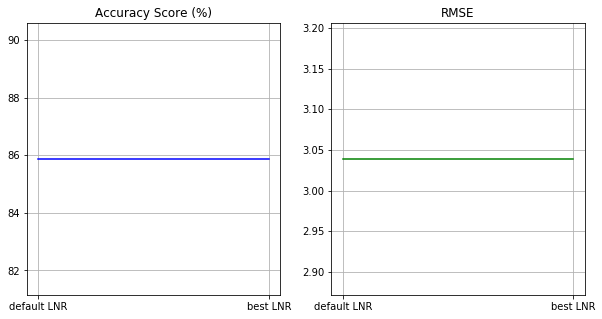

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Accuracy Score (%)')
plt.plot(['default LNR', 'best LNR'], [base_lnr_accuracy['accuracy'], best_lnr_accuracy['accuracy']], 'blue')
plt.grid()
plt.subplot(122)
plt.title('RMSE')
plt.plot(['default LNR', 'best LNR'], [base_lnr_accuracy['rmse'], best_lnr_accuracy['rmse']], 'green')
plt.grid()
plt.show()

### Lasso Regression

In [13]:
las_grid = {
    'alpha': np.arange(1,3,0.01),
    'fit_intercept': [True, False],
    'max_iter': [10,100,1000,10000,100000],
    'precompute': [True, False],
    'warm_start': [True, False],
    'random_state': np.arange(20,30,1),
    'selection': ['random', 'cyclic'],
}
print(las_grid)

{'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48

In [14]:
las = Lasso()
las_random = RandomizedSearchCV(estimator=las, param_distributions=las_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

las_random.fit(xtr, ytr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.0...
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 10000,
                                                     100000],
                                        'precompute': [True, False],
                                        'random_st

In [15]:
las_random.best_params_

{'warm_start': True,
 'selection': 'cyclic',
 'random_state': 20,
 'precompute': False,
 'max_iter': 100,
 'fit_intercept': True,
 'alpha': 1.06}

### Lasso with default hyperparameters

In [16]:
base_las = Lasso()
base_las.fit(xtr, ytr)
base_las_accuracy = evaluate(base_las, xts, yts)

Model Performance
Average Error: 6.5557 degrees.
Accuracy = 45.62%.
RMSE = 7.93
R2 Score = 0.28.


### Lasso with best hyperparameters

In [17]:
best_las = Lasso(warm_start = False, selection = 'cyclic', random_state = 22, precompute = False, max_iter = 100,
                 fit_intercept = True, alpha = 1.01)
best_las.fit(xtr, ytr)
best_las_accuracy = evaluate(best_las, xts, yts)

Model Performance
Average Error: 6.5841 degrees.
Accuracy = 45.42%.
RMSE = 7.97
R2 Score = 0.27.


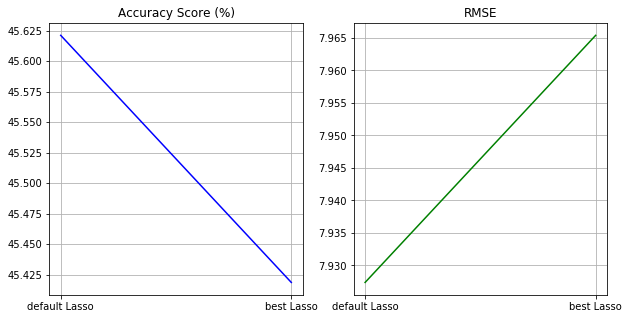

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Accuracy Score (%)')
plt.plot(['default Lasso', 'best Lasso'], [base_las_accuracy['accuracy'], best_las_accuracy['accuracy']], 'blue')
plt.grid()
plt.subplot(122)
plt.title('RMSE')
plt.plot(['default Lasso', 'best Lasso'], [base_las_accuracy['rmse'], best_las_accuracy['rmse']], 'green')
plt.grid()
plt.show()

### Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [20]:
plr_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X' :[True, False],
}
print(plr_grid)

{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}


In [21]:
plr = LinearRegression()
plr_random = RandomizedSearchCV(estimator=plr, param_distributions=plr_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

plr_random.fit(xtr, ytr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   45.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=41, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [22]:
plr_random.best_params_

{'normalize': False, 'fit_intercept': True, 'copy_X': False}

### Polynomial Regression with default hyperparameters

In [23]:
base_plr = LinearRegression()
base_plr.fit(xtr, ytr)
base_plr_accuracy = evaluate(base_plr, xts, yts)

Model Performance
Average Error: 1.9529 degrees.
Accuracy = 85.87%.
RMSE = 3.04
R2 Score = 0.89.


### Polynomial Regression with best hyperparameters

In [24]:
polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression(normalize = False, fit_intercept= True, copy_X = False)
)
polyReg.fit(xtr,ytr)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
# base_elas = ElasticNet()
# base_elas.fit(xtr, ytr)
# base_elas_accuracy = evaluate(base_elas, xts, yts)
polyReg.fit(xtr, ytr)
polyReg_accuracy = evaluate(polyReg,xts,yts)
#polyReg.score(xts,yts)

Model Performance
Average Error: 1.5495 degrees.
Accuracy = 89.71%.
RMSE = 2.67
R2 Score = 0.92.


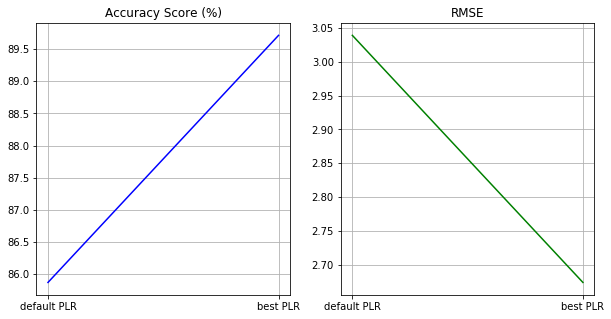

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Accuracy Score (%)')
plt.plot(['default PLR', 'best PLR'], [base_plr_accuracy['accuracy'], polyReg_accuracy['accuracy']], 'blue')
plt.grid()
plt.subplot(122)
plt.title('RMSE')
plt.plot(['default PLR', 'best PLR'], [base_plr_accuracy['rmse'], polyReg_accuracy['rmse']], 'green')
plt.grid()
plt.show()

### Combination beserta evaluation metrics

In [27]:
accuracy_list = [best_lnr_accuracy['accuracy'],polyReg_accuracy['accuracy'],best_las_accuracy['accuracy']]
rmse_list = [best_lnr_accuracy['rmse'],polyReg_accuracy['rmse'], best_las_accuracy['rmse']]
r2_list = [best_lnr_accuracy['r2'],polyReg_accuracy['r2'], best_las_accuracy['r2']]
score_list = [best_lnr.score(xts, yts),polyReg.score(xts,yts), best_las.score(xts, yts)]

In [28]:
all_df = pd.DataFrame({'accuracy_value (%)': accuracy_list, 'RMSE': rmse_list, 'R2': r2_list, 'score': score_list}, index='LinearRegression PolynomialRegression Lasso'.split(' '))
all_df

,accuracy_value (%),RMSE,R2,score
LinearRegression,85.872063,3.038915,0.893866,0.893866
PolynomialRegression,89.713626,2.674056,0.917821,0.917821
Lasso,45.418534,7.965378,0.270827,0.270827


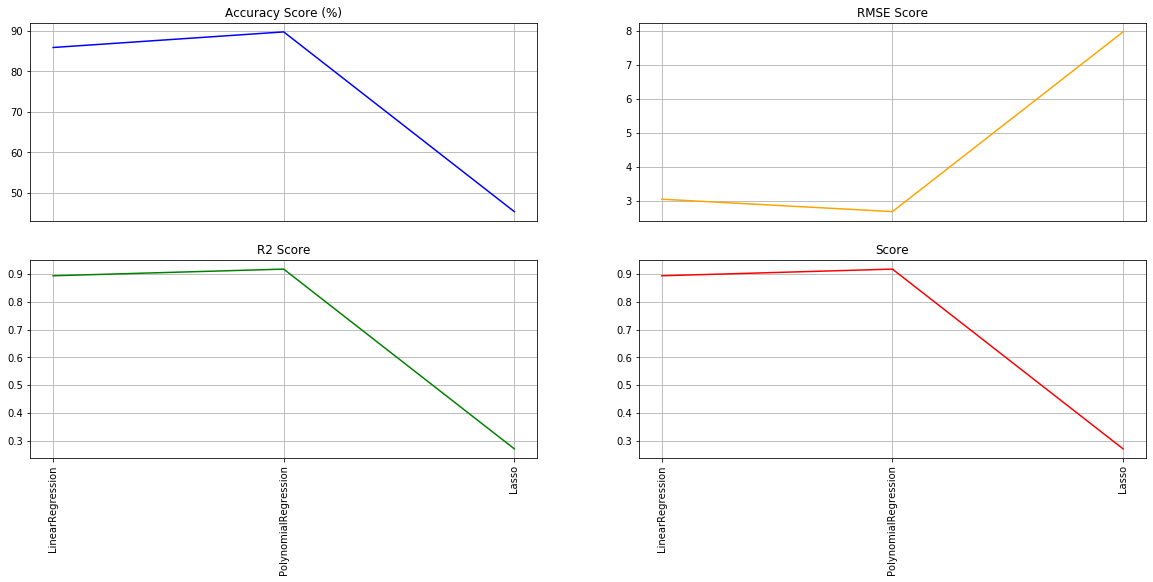

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(221)
plt.title('Accuracy Score (%)')
plt.plot(all_df.index.tolist(), all_df['accuracy_value (%)'], 'blue')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid()
plt.subplot(222)
plt.title('RMSE Score')
plt.plot(all_df.index.tolist(), all_df['RMSE'], 'orange')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid()
plt.subplot(223)
plt.title('R2 Score')
plt.plot(all_df.index.tolist(), all_df['R2'], 'green')
plt.xticks(rotation=90)
plt.grid()
plt.subplot(224)
plt.title('Score')
plt.plot(all_df.index.tolist(), all_df['score'], 'red')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Check Model Over fitting or Under Fitting

<hr>

### Polynomial Regression_Train

<hr>

In [30]:
polyReg.fit(xtr, ytr)
polyReg_accuracy = evaluate(polyReg,xtr,ytr)

Model Performance
Average Error: 1.5481 degrees.
Accuracy = 89.68%.
RMSE = 2.68
R2 Score = 0.92.


### Polynomial Regression_Test

<hr>

In [31]:
polyReg.score(xts, yts)
polyReg_accuracy = evaluate(polyReg,xts,yts)

Model Performance
Average Error: 1.5495 degrees.
Accuracy = 89.71%.
RMSE = 2.67
R2 Score = 0.92.


### Summary & Save model into Binary File

In [32]:
xtr.columns

Index(['Lyft', 'Uber', 'Black', 'Black SUV', 'Lux', 'Lux Black',
       'Lux Black XL', 'Lyft.1', 'Lyft XL', 'Shared', 'UberPool', 'UberX',
       'UberXL', 'WAV', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', 'distance'],
      dtype='object')

In [33]:
final = evaluate(polyReg, xts, yts)

Model Performance
Average Error: 1.5495 degrees.
Accuracy = 89.71%.
RMSE = 2.67
R2 Score = 0.92.


In [34]:
pred = polyReg.predict(xts)

In [35]:
prediction = pd.DataFrame({'actual': yts, 'pred': pred}, dtype='int64')
prediction.sort_values('actual',inplace=True)
prediction.reset_index(inplace=True)

In [36]:
prediction

,index,actual,pred
0,52220,2,5.167969
1,290949,2,4.782715
2,598697,2,4.674805
3,581270,2,4.747070
4,229362,2,4.131836
...,...,...,...
127044,120206,80,44.990234
127045,142631,87,42.635254
127046,222082,89,41.813965
127047,232057,89,42.394531


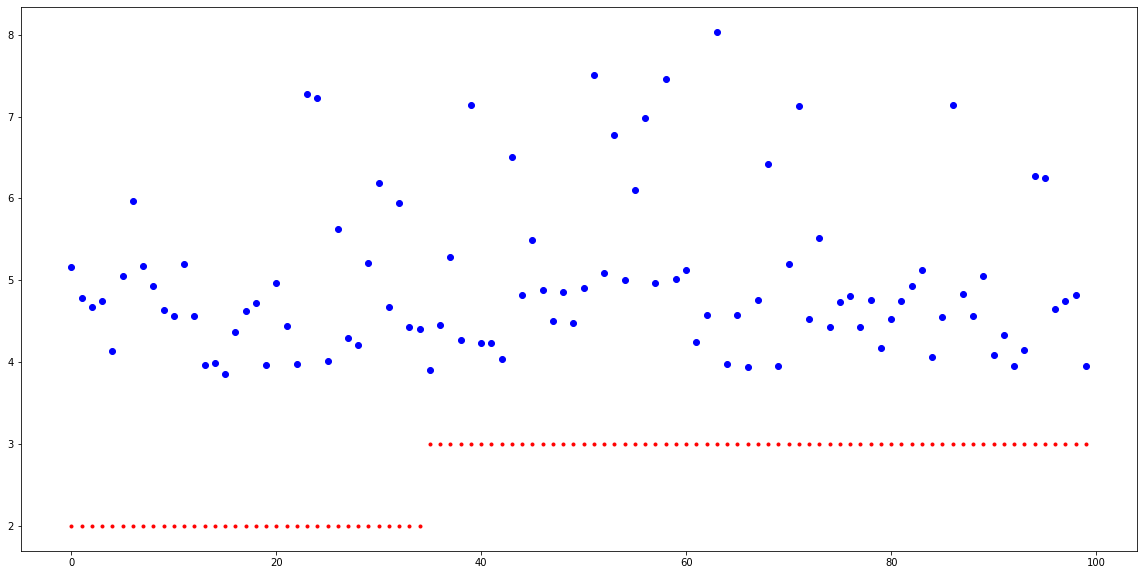

In [37]:
plt.figure(figsize=(20,10))
plt.plot(prediction.head(100).index.tolist(), prediction.head(100).actual, 'r.')
plt.plot(prediction.head(100).index.tolist(), prediction.head(100).pred, 'bo')
plt.show()

##### Cek harga aktual dan prediksi

In [38]:
i = 5

a = list(xtr.iloc[i])
ytr.iloc[i], round((polyReg.predict([a])[0]), 1)

(13.5, 12.4)

In [39]:
import joblib

In [40]:
joblib.dump(polyReg,"modelPrediksi")

['modelPrediksi']